# <center> WebScrapping Project : Ecommerce Data Analysis <center>

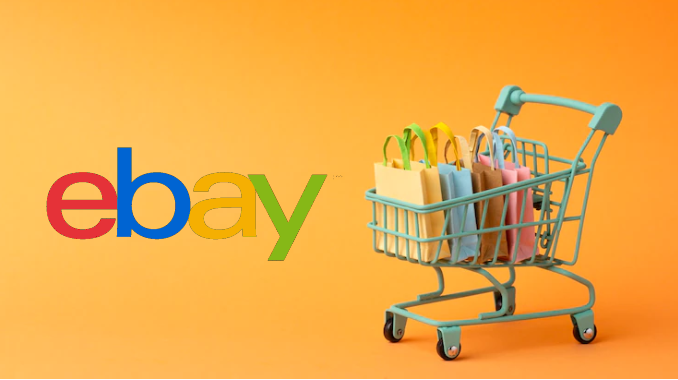


# 

#   WEBSCRAPE EBAY PRODUCT DATA

***This data below will show a filter category of books that contain Business Intelligence in its title***

# 

In [2]:
!pip install prettytable

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Import all libraries required

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [4]:
# Specify the URL of the Ebay item

url_pattern = 'https://www.ebay.com/sch/267/i.html?_from=R40&_nkw=Business+Intelligence+&rt=nc'

In [5]:
# create an empty list to store the scraped data
product_data = []

# iterate over the page numbers
for page_num in range(1, 11):   # scrape data from page 1 to 10
    # create the url for the current page
    url = url_pattern.format(page_num=page_num)

In [6]:
#send a GET request to the URL and extract the HTML content

response = requests.get(url)
content = response.content

In [7]:
#Use Beautiful Soup to parse the HTML content

soup = BeautifulSoup(content, 'html.parser')

In [8]:
#Extract the product information needed
items = soup.find_all('div', {'class': 's-item__wrapper clearfix'})
    

for item in items:
    title = item.find('div', {'class': 's-item__title'}).text.strip()
    
    price_sold = float(item.find('span', {'class': 's-item__price'}).text.replace('$','').replace(',','').strip())
    shipping_cost = item.find('span', {'class': 's-item__shipping s-item__logisticsCost'})
    if shipping_cost:
        shipping_cost = shipping_cost.text.replace('+','').replace('$','').replace(',','').strip()
    else:
        shipping_cost = 0.0
    item_location = item.find('span', {'class': 's-item__location s-item__itemLocation'})
    if item_location:
        item_location = item_location.text.replace('from','').strip()
    else:
        item_location = ''
    item_seller = item.find('span', {'class':'s-item__seller-info'})
    if item_seller:
        item_seller = item_seller.text.strip()
    else:
        item_seller = ''
    link = item.find('a', {'class': 's-item__link'})['href']
    product_data.append([title, price_sold, shipping_cost, item_location, item_seller, link])
    
BIbooks = pd.DataFrame(product_data, columns=['Title', 'Price_sold', 'Shipping_cost', 'Item_location','Item_seller', 'Link'])
print(BIbooks.head())


                                               Title  Price_sold  \
0                                       Shop on eBay       20.00   
1  Emotional Intelligence 2.0 by Bradberry, Travi...        6.51   
2  The Definitive Guide to DAX: Business intellig...       32.90   
3  Microsoft SharePoint 2010 Business Intelligenc...       23.74   
4  New ListingThe Definitive Guide to DAX: Busine...       22.61   

    Shipping_cost   Item_location                      Item_seller  \
0             0.0                                                    
1  10.81 shipping   United States   thrift.books (3,366,717) 99.3%   
2  25.10 shipping   United States  dunkin_bookstore (31,745) 99.3%   
3  29.55 shipping   United States            sch-8076 (1,260) 100%   
4  33.53 shipping  United Kingdom     webuybooks (1,831,962) 99.3%   

                                                Link  
0  https://ebay.com/itm/123456?hash=item28caef0a3...  
1  https://www.ebay.com/itm/193316543093?epid=128...  
2  ht

In [9]:
#Display the first 2 rows of the Business Inteligence(BI) books

BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link
0,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?hash=item28caef0a3...
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...


In [10]:
#To separate the Item_seller column into two columns, one for the seller name and one for the seller rating

BIbooks[['Seller_name','Seller_feedback', 'Seller_Rating%']] = BIbooks['Item_seller'].str.split(' ', expand=True)
BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
0,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?hash=item28caef0a3...,,None,None
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...,thrift.books,"(3,366,717)",99.3%


In [11]:
#check for null values

BIbooks.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_location      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    1
Seller_Rating%     1
dtype: int64

In [12]:
#Drop the first row column 

BIbooks = BIbooks.drop([0], axis=0) #drop the first row

BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...,thrift.books,"(3,366,717)",99.3%
2,The Definitive Guide to DAX: Business intellig...,32.90,25.10 shipping,United States,"dunkin_bookstore (31,745) 99.3%",https://www.ebay.com/itm/334944259503?epid=242...,dunkin_bookstore,"(31,745)",99.3%


In [13]:
#Remove the brackets from the 'Seller_feedback' column by calling the str.replace() 
BIbooks['Seller_feedback'] = BIbooks['Seller_feedback'].str.replace('[(),]', '', regex=True)


#Remove the Percentage % sign from the 'Seller_Rating%' column
BIbooks['Seller_Rating%'] = BIbooks['Seller_Rating%'].str.replace('%', '', regex=True)


#Convert the column datatype using the astype()

BIbooks['Seller_feedback'] = BIbooks['Seller_feedback'].astype(int)
BIbooks['Seller_Rating%'] = BIbooks['Seller_Rating%'].astype(float)
BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...,thrift.books,3366717,99.3
2,The Definitive Guide to DAX: Business intellig...,32.90,25.10 shipping,United States,"dunkin_bookstore (31,745) 99.3%",https://www.ebay.com/itm/334944259503?epid=242...,dunkin_bookstore,31745,99.3


In [14]:
#Check for null values

BIbooks.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_location      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    0
Seller_Rating%     0
dtype: int64

In [15]:
#Check for info

BIbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 1 to 75
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            75 non-null     object 
 1   Price_sold       75 non-null     float64
 2   Shipping_cost    75 non-null     object 
 3   Item_location    75 non-null     object 
 4   Item_seller      75 non-null     object 
 5   Link             75 non-null     object 
 6   Seller_name      75 non-null     object 
 7   Seller_feedback  75 non-null     int32  
 8   Seller_Rating%   75 non-null     float64
dtypes: float64(2), int32(1), object(6)
memory usage: 5.1+ KB


In [16]:
BIbooks.head(45)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...,thrift.books,3366717,99.3
2,The Definitive Guide to DAX: Business intellig...,32.90,25.10 shipping,United States,"dunkin_bookstore (31,745) 99.3%",https://www.ebay.com/itm/334944259503?epid=242...,dunkin_bookstore,31745,99.3
3,Microsoft SharePoint 2010 Business Intelligenc...,23.74,29.55 shipping,United States,"sch-8076 (1,260) 100%",https://www.ebay.com/itm/295142577933?epid=996...,sch-8076,1260,100.0
4,New ListingThe Definitive Guide to DAX: Busine...,22.61,33.53 shipping,United Kingdom,"webuybooks (1,831,962) 99.3%",https://www.ebay.com/itm/364481438534?epid=200...,webuybooks,1831962,99.3
5,"Business Intelligence, Analytics, A..., Ramesh...",17.90,28.65 shipping,United States,big_g_store (46) 100%,https://www.ebay.com/itm/204448557377?epid=160...,big_g_store,46,100.0
6,"Business Intelligence: Practices, Technologies...",12.00,26.65 shipping,United States,"thingsdesired (3,363) 100%",https://www.ebay.com/itm/134632310853?epid=738...,thingsdesired,3363,100.0
7,Data Mining for Business Intelligence: Concept...,6.99,65.18 shipping,United States,georgeswave (706) 100%,https://www.ebay.com/itm/126089095509?epid=844...,georgeswave,706,100.0
8,The Profit Impact of Business Intelligence by ...,5.50,12.46 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/195132874362?epid=569...,thrift.books,3366717,99.3
9,Business Intelligence: A Managerial Perspectiv...,8.49,61.02 shipping,United States,"stvincentcharity (81,409) 99.7%",https://www.ebay.com/itm/314650460709?epid=177...,stvincentcharity,81409,99.7
10,Expert Systems: Artificial Intelligence in Bus...,8.08,6.40 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/195979734112?hash=ite...,thrift.books,3366717,99.3


In [17]:
#create new columns for shipping cost value and shipping type from 'Shipping_cost'column
BIbooks[['Shipping_cost_value', 'Shipping_type']] = BIbooks['Shipping_cost'].str.extract('([\d\.]+)\s*([a-zA-Z\s]+)', expand=True)

#show the updated dataframe
BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...,thrift.books,3366717,99.3,10.81,shipping
2,The Definitive Guide to DAX: Business intellig...,32.90,25.10 shipping,United States,"dunkin_bookstore (31,745) 99.3%",https://www.ebay.com/itm/334944259503?epid=242...,dunkin_bookstore,31745,99.3,25.10,shipping


In [18]:
#add "paid" in front of "shipping" in the Shipping_type column
BIbooks['Shipping_type'] = 'Paid ' + BIbooks['Shipping_type'].str.replace('shipping', 'shipping', regex=True)


#Fill the NaN values in the Shipping_type column with 'Free International shipping'
BIbooks['Shipping_type'] = BIbooks['Shipping_type'].fillna('Free International shipping')


#Fill the NaN values in the Shipping_type column with 'Free International shipping'
BIbooks['Shipping_cost_value'] = BIbooks['Shipping_cost_value'].fillna(0)


#Convert data type to float
BIbooks['Shipping_cost_value'] = BIbooks['Shipping_cost_value'].astype(float)


BIbooks.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
1,"Emotional Intelligence 2.0 by Bradberry, Travi...",6.51,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/193316543093?epid=128...,thrift.books,3366717,99.3,10.81,Paid shipping
2,The Definitive Guide to DAX: Business intellig...,32.90,25.10 shipping,United States,"dunkin_bookstore (31,745) 99.3%",https://www.ebay.com/itm/334944259503?epid=242...,dunkin_bookstore,31745,99.3,25.10,Paid shipping


In [19]:
BIbooks.iloc[40:46, :]

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_value,Shipping_type
41,"Business Intelligence, Analytics, and Data Sci...",25.00,71.04 shipping,United States,chrisash50 (482) 100%,https://www.ebay.com/itm/235012213575?epid=234...,chrisash50,482,100.0,71.04,Paid shipping
42,Business Intelligence for the Enterprise by Bi...,6.32,10.81 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/194950566194?epid=233...,thrift.books,3366717,99.3,10.81,Paid shipping
43,Decision Trees for Business Intelligence and D...,20.53,10.26 shipping,United States,"thrift.books (3,366,717) 99.3%",https://www.ebay.com/itm/144518017006?epid=570...,thrift.books,3366717,99.3,10.26,Paid shipping
44,"Business Intelligence, Analytics, and Data Sci...",30.00,59.56 shipping,United States,crafty_phoenix (18) 100%,https://www.ebay.com/itm/204456382978?hash=ite...,crafty_phoenix,18,100.0,59.56,Paid shipping
45,Business Analytics for Managers: Taking Busine...,18.73,3.47 shipping,Australia,"the_nile (1,189,595) 98%",https://www.ebay.com/itm/134607921778?epid=225...,the_nile,1189595,98.0,3.47,Paid shipping
46,Business Intelligence and Analytics: Systems f...,44.95,62.49 shipping,United States,"rockymtntext (93,560) 96.9%",https://www.ebay.com/itm/134684334403?epid=177...,rockymtntext,93560,96.9,62.49,Paid shipping


In [20]:
#Check for info

BIbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 1 to 75
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                75 non-null     object 
 1   Price_sold           75 non-null     float64
 2   Shipping_cost        75 non-null     object 
 3   Item_location        75 non-null     object 
 4   Item_seller          75 non-null     object 
 5   Link                 75 non-null     object 
 6   Seller_name          75 non-null     object 
 7   Seller_feedback      75 non-null     int32  
 8   Seller_Rating%       75 non-null     float64
 9   Shipping_cost_value  75 non-null     float64
 10  Shipping_type        75 non-null     object 
dtypes: float64(3), int32(1), object(7)
memory usage: 6.3+ KB


# 

# 

## Data Analysis 

What is the: 
* Average price of books
* Average shipping cost
* Seller feedback and rating
* Shipping type
* Item location
* Price vs. shipping cost
* Top sellers
* Price distribution by seller

In [21]:
BIbooks.describe()

,Price_sold,Seller_feedback,Seller_Rating%,Shipping_cost_value
count,75.000000,7.500000e+01,75.000000,75.000000
mean,23.215733,1.637507e+06,99.154667,27.903600
std,24.997144,1.551111e+06,0.918914,20.648778
min,4.320000,1.000000e+00,93.800000,3.090000
25%,6.415000,1.191700e+04,99.300000,10.810000
50%,14.220000,1.189595e+06,99.300000,24.410000
75%,29.995000,3.366717e+06,99.350000,33.015000
max,142.160000,3.366717e+06,100.000000,74.800000



* The Average price of BIbooks on Ebay is 21.14
* The Average shipping cost of BIbooks on Ebay is  27.47

* The Minimum price of BIbooks on Ebay is 2
* The minimum shipping cost of BIbooks on Ebay is 0

* The Maximum price of of BIbooks on Ebay is 130.28
* The Maximum shipping cost of BIbooks on Ebay is 202.23


# 

In [22]:
BIbooks.nunique()

Title                  74
Price_sold             72
Shipping_cost          55
Item_location           4
Item_seller            38
Link                   75
Seller_name            38
Seller_feedback        38
Seller_Rating%         16
Shipping_cost_value    55
Shipping_type           1
dtype: int64

In [23]:
BIbooks.corr()

,Price_sold,Seller_feedback,Seller_Rating%,Shipping_cost_value
Price_sold,1.000000,-0.179801,-0.076338,0.143315
Seller_feedback,-0.179801,1.000000,0.054871,-0.676335
Seller_Rating%,-0.076338,0.054871,1.000000,0.134294
Shipping_cost_value,0.143315,-0.676335,0.134294,1.000000


# 



* The correlation coefficient between Price_sold and Shipping_cost_value is 0.325289, this indicates a weak positive correlation, which means that there is some tendency for books with higher prices to have higher shipping costs.


* The correlation coefficient between Price_sold and Seller_feedback is -0.236621, this indicates a negative correlation, the negative correlation coefficient suggests that as the seller feedback rating increases, the price of the book tends to decrease. 


* The correlation coefficient between Price_sold and Seller_Rating% is -0.034804, this indicates no significant correlation between them.


# 

In [24]:
#Number of books by location
BIbooks['Item_location'].value_counts()

United States     66
United Kingdom     6
Australia          2
Canada             1
Name: Item_location, dtype: int64

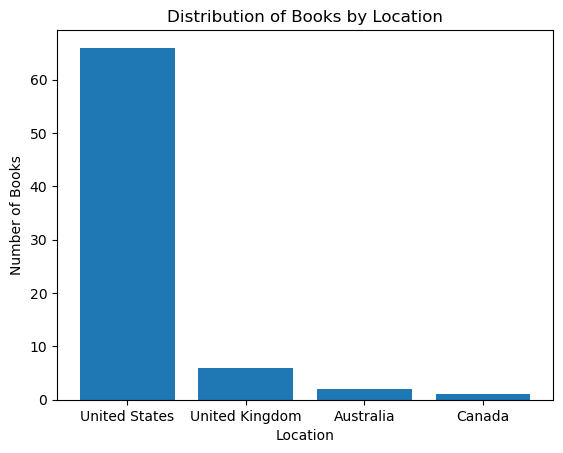

In [25]:
#number of books by location
Book_location = BIbooks['Item_location'].value_counts()


plt.bar(Book_location.index, Book_location.values)


plt.title('Distribution of Books by Location')
plt.xlabel('Location')
plt.ylabel('Number of Books')


plt.show()


# 

# 

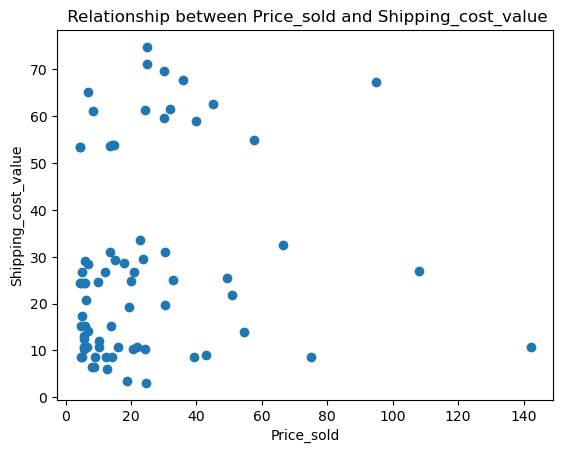

In [26]:
#Relationship between 'Price_sold' and 'Shipping_cost_value'

plt.scatter(x=BIbooks['Price_sold'], y=BIbooks['Shipping_cost_value'])

plt.title(' Relationship between Price_sold and Shipping_cost_value')
plt.xlabel('Price_sold')
plt.ylabel('Shipping_cost_value')


plt.show()


* The scattterplot also this indicates a weak positive correlation, which confirms that there is some tendency for books with higher prices to have higher shipping costs.

# 

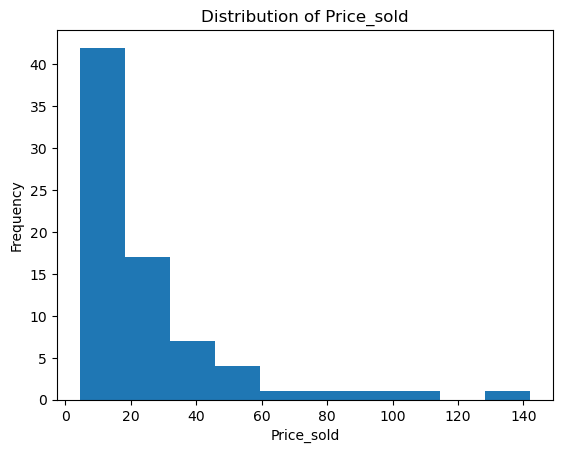

In [27]:
#distribution of Price_sold

plt.hist(BIbooks['Price_sold'], bins=10)

plt.title('Distribution of Price_sold')
plt.xlabel('Price_sold')
plt.ylabel('Frequency')
plt.show()

* Most BIbooks on EBAY are sold within the range of 2 Dollars  to 20 dollars

# 

In [28]:
#Count of shipping type
BIbooks['Shipping_type'].value_counts()

Paid shipping    75
Name: Shipping_type, dtype: int64

In [29]:
# total shipping cost of shipping type

BIbooks.groupby('Shipping_type')['Shipping_cost_value'].sum()

Shipping_type
Paid shipping    2092.77
Name: Shipping_cost_value, dtype: float64

In [30]:
# max shipping cost of shipping type

BIbooks.groupby('Shipping_type')['Shipping_cost_value'].max()

Shipping_type
Paid shipping    74.8
Name: Shipping_cost_value, dtype: float64

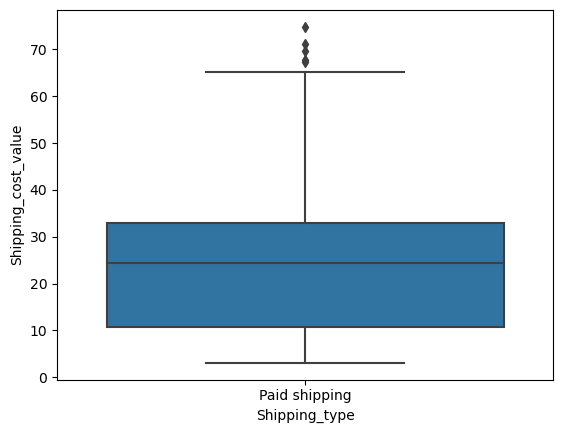

In [31]:
#relationship between Shipping_cost_value and Shipping_type 




sns.boxplot(x='Shipping_type', y='Shipping_cost_value', data=BIbooks)
plt.show()


# 

67 of the BI books has Paid shipping, which comes to a total cost of $1725.17, and the highest shipping cost for a book is 44.16 
   

# 

In [32]:
#find the top 10 Seller_name with the highest Seller_feedback

BIbooks.groupby('Seller_name')['Seller_feedback'].max().nlargest(10)

Seller_name
thrift.books             3366717
second.sale              2777201
webuybooks               1831962
discover-books           1591196
the_nile                 1189595
worldofbooksusa           987562
grandeagleretail          903333
cmedia_group              828409
your_online_bookstore     687192
awesomebooksusa           394664
Name: Seller_feedback, dtype: int32

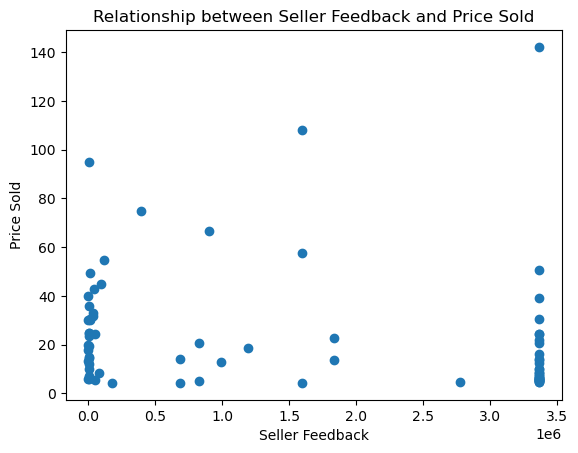

In [33]:
# Create a scatter plot
plt.scatter(BIbooks['Seller_feedback'], BIbooks['Price_sold'])

# Add chart labels
plt.title('Relationship between Seller Feedback and Price Sold')
plt.xlabel('Seller Feedback')
plt.ylabel('Price Sold')

# Display the chart
plt.show()


# 

In [34]:
# top 10 most expensive book by title
top_books = BIbooks.groupby('Title')['Price_sold'].max().nlargest(10)


table = PrettyTable()
table.field_names = ["Title", "Price Sold"]


for Title, price_sold in zip(top_books.index, top_books.values):
    table.add_row([Title, price_sold])


print(table)


+---------------------------------------------------------------------------------------------+------------+
|                                            Title                                            | Price Sold |
+---------------------------------------------------------------------------------------------+------------+
|                                 Global Business Intelligence                                |   142.16   |
|              Business Intelligence in the Digital Economy  Opportunities  Limi              |   108.09   |
|       Business Intelligence, Analytics, and Data Science: A Managerial Perspective 4th      |    95.0    |
|               Microsoft Business Intelligence Tools for Excel Analysts By Mich              |    75.0    |
| New ListingBusiness Intelligence Guidebook: From Data Integration to Analytics by Rick Sher |   66.53    |
|                               Practical Business Intelligence                               |   57.49    |
|       Business In

# 

In [36]:
# save the dataframe to csv
BIbooks.to_csv(r'C:\Users\Simran\Desktop\Projects\# My PROJECTS PORTFOLIO\Ebay_BusinessIntelligenceBooks.csv', index=False)

# 